## Problem statement

### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
# loading dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as styles
styles.use("fivethirtyeight")
from sklearn.model_selection import train_test_split

In [2]:
# load dataset to a pandas data frame
train_df=pd.read_csv(r'C:\Users\Hp\Downloads\train_ctrUa4K.csv')
print(train_df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

## Exploratory Data Analysis

In [3]:
# check number of rows and columns
train_df.shape

(614, 13)

In [4]:
# column names
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# column data types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# checking for duplicate values
train_df.duplicated().any()

False

In [7]:
# checking for missing values
print(train_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# Descriptive statistics on our data
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

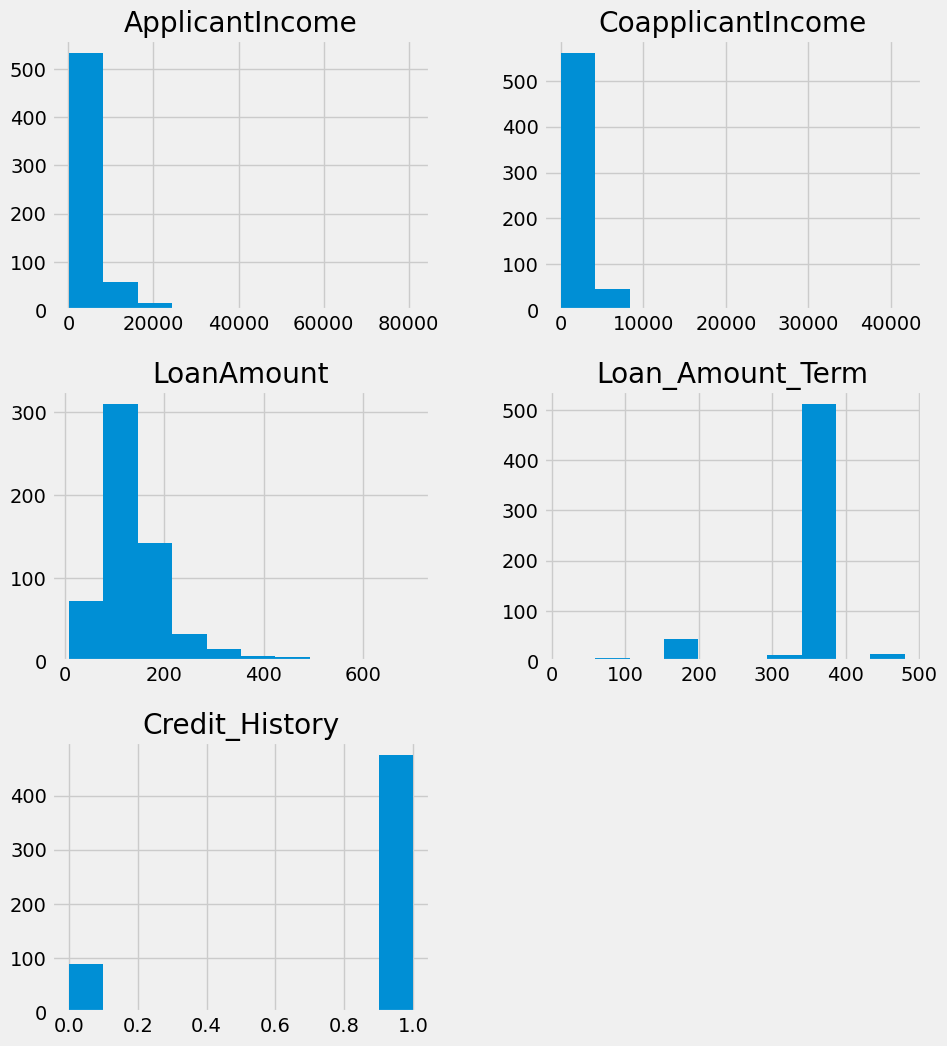

In [9]:
# Visualizing distribution of numerical variable
train_df.hist(figsize=(10,12))

In [10]:
# checking cardinality of categorical vriables
for col in train_df.select_dtypes(exclude=np.number):
    print(col,train_df[col].nunique())
    print('='*15)

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


C:\Users\Hp\AppData\Local\Temp\ipykernel_8428\1148066149.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True,square=True)


<Axes: >

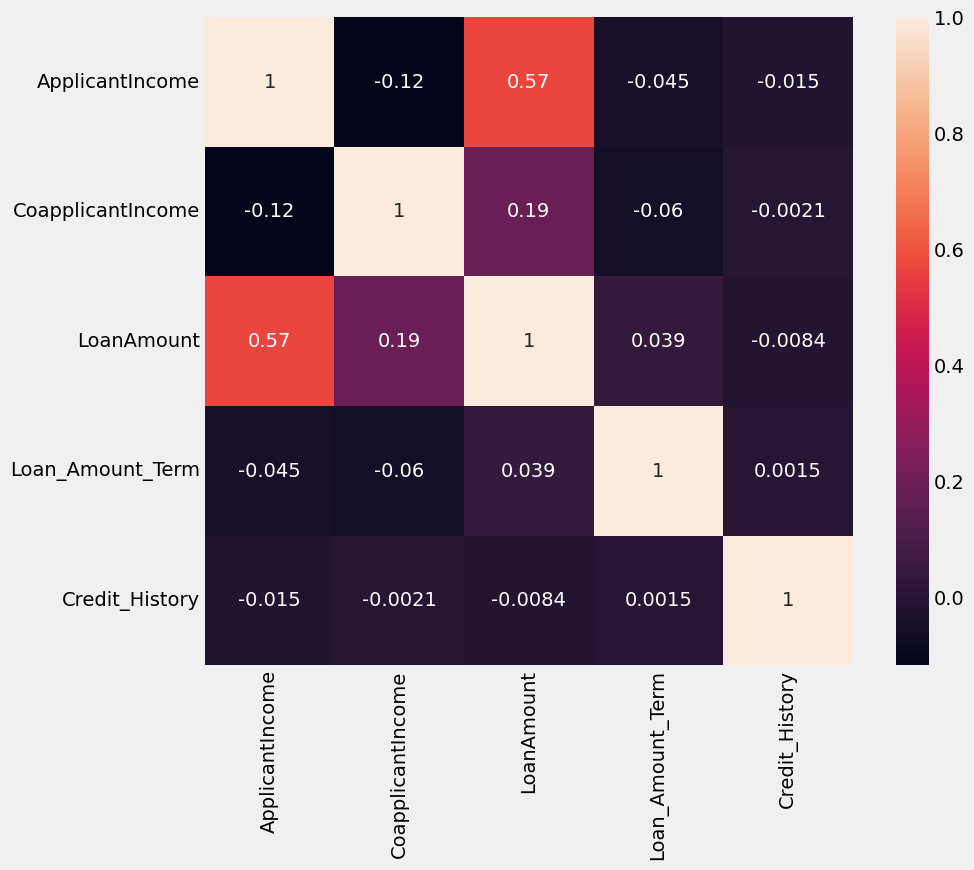

In [11]:
## correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),annot=True,square=True)

Text(0.5, 1.0, 'BoxPlot')

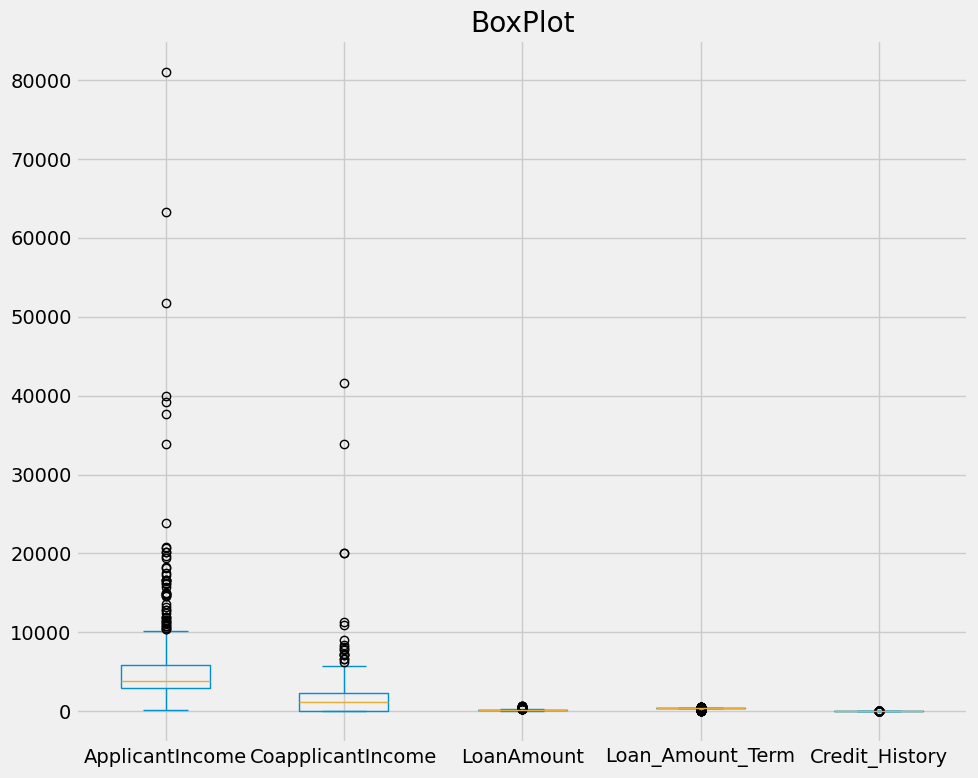

In [12]:
# checking for outliers
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
data=train_df.select_dtypes(include=np.number)
data.plot(kind='box')
plt.title('BoxPlot')


<Axes: >

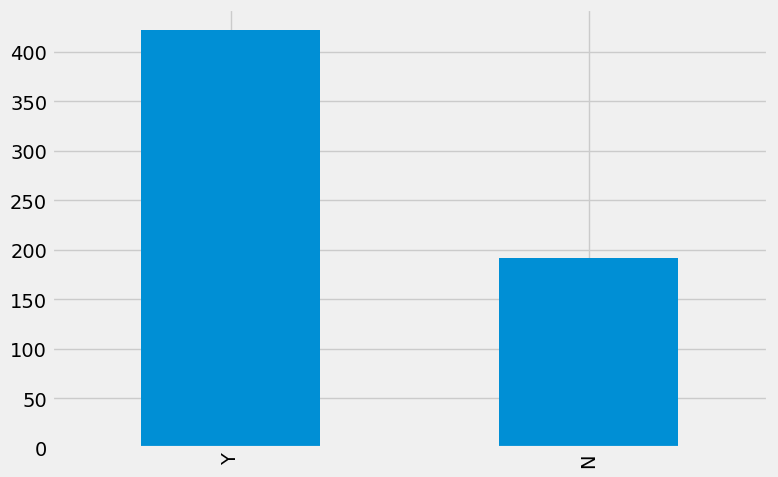

In [13]:
## check for imbalance in our dataset
plt.figure(figsize=(8,5))
train_df['Loan_Status'].value_counts().plot.bar()

### Handling Imbalance in our Dataset

In [14]:
# we shall oversample the majority clss
N_df=train_df.query("Loan_Status=='N'")
Y_df=train_df.query("Loan_Status=='Y'")
New_df=N_df.sample(len(train_df.query("Loan_Status=='Y'")),replace=True)
train_df=pd.concat([Y_df,New_df])
print(train_df.shape)

(844, 13)


In [15]:
## Split into train and test set
X=train_df.drop(['Loan_ID','Loan_Status'],axis=1)
y=train_df['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

## Preprocessing

### handling missing values

In [16]:
from sklearn.impute import SimpleImputer

def impute_missing_values(X_train,X_test):
    # Credit_history is an encoded categorical variable we give same treatment for imputation with other categorical 
    num_cols=X_train.select_dtypes(exclude=['O']).drop('Credit_History',axis=1).columns.tolist()
    cat_cols=X_train.select_dtypes(include=['O']).columns.tolist()
    cat_cols.append('Credit_History')
    # impute categorical columns with median
    my_imputer = SimpleImputer(strategy = 'most_frequent')
    X_train[cat_cols]=my_imputer.fit_transform(X_train[cat_cols])
    X_test[cat_cols]=my_imputer.transform(X_test[cat_cols])
    # impute numerical columns with median
    my_imputer = SimpleImputer(strategy = 'median')
    X_train[num_cols]=my_imputer.fit_transform(X_train[num_cols])
    X_test[num_cols]=my_imputer.transform(X_test[num_cols])
    return X_train,X_test

In [17]:
X_train,X_test=impute_missing_values(X_train,X_test)
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [18]:
# Encoding target Variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

## Encoding Categorical Data

In [19]:
from sklearn.preprocessing import LabelEncoder
def categorical_encode(df):
    df_categorical=df.select_dtypes(exclude=np.number).columns
    filters=['Dependents','Property_Area']
    for cols in df_categorical:
        if cols not in filters:
            Le=LabelEncoder()
            df[cols]=Le.fit_transform(df[cols])
        elif cols== 'Dependents': 
            df['Dependents']=df['Dependents'].apply(lambda x:1 if x=='3+' else 0)
        elif cols=='Property_Area': # for property_Area use one hot encoding
            df = pd.get_dummies(df, columns = [cols],drop_first=True)
    return df

In [20]:
X_train=categorical_encode(X_train)
X_test=categorical_encode(X_test)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
241,1,1,0,1,0,2510.0,1983.0,140.0,180.0,1,0,1
305,1,0,0,1,0,2000.0,0.0,128.0,360.0,1,0,1
274,1,1,0,0,0,3900.0,0.0,90.0,360.0,1,1,0
204,1,1,0,1,0,3917.0,0.0,124.0,360.0,1,1,0
259,1,1,1,1,0,4931.0,0.0,128.0,360.0,1,1,0


## Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
def scaler(X_train,X_test):
    scaler=MinMaxScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    return X_train,X_test

In [22]:
X_train,X_test=scaler(X_train,X_test)

## Building Model

we shall build 4 different models for this problem
1. LogisticsRegression
2. Xgboost classifier
3. RandomForest Classifier
4. GradientBoosting 

In [23]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [24]:
def train_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    training_score=accuracy_score(y_train,model.predict(X_train))
    test_score=accuracy_score(y_test,y_pred)
    return training_score,test_score

In [25]:
model=LogisticRegression() #use default parameters
train,test=train_evaluate_model(model)
print(f'training accuracy:{train}\ntesting accuracy:{test}')

training accuracy:0.7140740740740741
testing accuracy:0.6982248520710059


In [26]:
model2=xgb.XGBClassifier(max_depth=4,n_estimators=100)
train,test=train_evaluate_model(model2)
print(f'training accuracy:{train}\ntesting accuracy:{test}')

training accuracy:0.9925925925925926
testing accuracy:0.8698224852071006


In [27]:
model3=RandomForestClassifier(max_depth=2, n_estimators=50,min_samples_split=4, max_leaf_nodes=5)
train,test=train_evaluate_model(model3)
print(f'training accuracy:{train}\ntesting accuracy:{test}')

training accuracy:0.7066666666666667
testing accuracy:0.7396449704142012


In [28]:
model4=GradientBoostingClassifier(n_estimators=50)
train,test=train_evaluate_model(model4)
print(f'training accuracy:{train}\ntesting accuracy:{test}')

training accuracy:0.8414814814814815
testing accuracy:0.7692307692307693


## Cross Validating our XGBOOST model . 

Due to limited data available , all our models are overfitiing . inorder to get the correct score for xgboost model we shall use cross validation technique

In [29]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=42)
newX=np.concatenate([X_train,X_test])
newy=np.concatenate([y_train,y_test])
scores=cross_val_score(model2,newX,newy,cv=kf)
print(f'cross validation scores : {scores}')
print(f'Mean accuracy : {scores.mean()}')

cross validation scores : [0.85882353 0.90588235 0.89411765 0.90588235 0.8452381  0.91666667
 0.82142857 0.8452381  0.94047619 0.91666667]
Mean accuracy : 0.8850420168067228
